The Machine Learning **(ML)** Algorithms used are:
* __[Supervised Learning:](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning#:~:text=for%20your%20situation.-,What%20is%20supervised%20learning%3F,-Supervised%20learning%20is)__
    * __[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)__
    * __[Decision Tree](https://scikit-learn.org/stable/modules/tree.html)__
    * __[Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__
    * __[XGBoost](https://xgboost.readthedocs.io/en/stable/install.html)__
<br><br>
* __[Unsupervised Learning:](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning#:~:text=and%20polynomial%20regression.-,What%20is%20unsupervised%20learning%3F,-Unsupervised%20learning%20uses)__
    * __[K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__<br>
<br>

### Below are some basic explanations, from the *[Machine Learning Specialization - DeepLearning.AI](https://www.deeplearning.ai/courses/machine-learning-specialization/)* courses.
#### Supervised Learning 
It is the use of labeled datasets to train ML algorithms.
During training, the input $x$ is mapped to the output $y$. If trained well, the algorithm will be able to predict unseen data.
Many factors tell if the ML model is trained well, such as the Gradient Descent where the input trainng data is utilized to fit the parameters w, b (or the weights) by minimizing the measure of the error between the model's predictions $f_{w,b}(x^{(i)})$, and the actual data $y^{(i)}$.
The measure is called the cost $J(w,b)$ where:
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$
In this notebook, we are using Classification. Therefore, the classification loss function loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right is discribed as follow:
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
And the Gradient Descent is a loop where we substract the partial derivative from the weights simultaneously:<br>
$$\text{repeat until convergence:} \; \lbrace \newline$$
$$  w = w -  \alpha \frac{\partial J(w,b)}{\partial w} \; \newline$$ 
$$ b = b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace $$
where, parameters $w$, $b$ are updated simultaneously *(calculating the partial derivatives for all the parameters before updating any of the parameters)*.  
The gradient is defined as:

$$\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \; \newline $$
$$\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})  \newline $$

Where $m$ is the number of training examples.
<br><br>
In this notebook, the Supervised Learning Algorithms are implemented with the __[$sklearn$](https://scikit-learn.org/stable/)__ library.
### Unsupervised Learning
It is the use of ML algorithms to identify patterns in data sets containing data points thar are neither classified nor labaled.
<br>In this notebook the $K$-means is used as an Unsupervised Learning Algorithm.
<br>The $K$-means algorithm is a method to automatically cluster similar
data points together. 

* It is the practive of grouping a training set $\{x^{(1)}, ..., x^{(m)}\}$,  into a few cohesive “clusters”. 
<br><br>
* $K$-means is an iterative procedure that
    * Starts by guessing the initial centroids, and then 
    * Refines this guess by 
        * Repeatedly assigning examples to their closest centroids, and then 
        * Recomputing the centroids based on the assignments.       
<br><br>
* The inner-loop of the algorithm repeatedly carries out two steps: 
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it.    
<br><br>
* The $K$-means algorithm will always converge to some final set of means for the centroids. 
<br><br>
* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the $K$-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).
<br><br>
* In this notebook the $K$-means is implemented in two ways:
    * Implementing the algorithms with $numpy$
    * Using the $sklearn$ Library

Start by importing many Libraries and Frameworks 

In [1]:
# for processing data
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# for building ML models
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, accuracy_score, classification_report
from sklearn.cluster import KMeans

from xgboost import XGBClassifier

from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.model_selection import LearningCurve

**[Pandas](https://pandas.pydata.org/)** is the best tool for reading *.csv* (and others) files and transforming them into tables, or what is called **Pandas Dataframes**
<br>
* Here we can see that we have 6 columns.
    * **Id**, the id of each record. It is not needed while training our models, it has not any representation of any of the training examples.
    * **SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm**, these are the features of each of the Iris flower, and each combination of them are properties of a certain Species.
    * **Species**, is the lablel of each record. As we can see, we have three species:
        * Iris-setosa
        * Iris-versicolor
        * Iris-virginica

### **The problem**
The problem here is to classify an Iris flower (under which Species does it fall), given just the four mentioned features, without a label.
<br>
And in order to do that, we need to train a ML algorithm with the current labeled dataset.

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

First we have to check if the dataset contains any null values.<br>
If yes we have to replace them.

In [4]:
print('Dataset shape:', iris_df.shape)
for col in iris_df.columns:
    print(f'NaN values count in column {col}:', iris_df[col].isna().sum())

Dataset shape: (150, 6)
NaN values count in column Id: 0
NaN values count in column SepalLengthCm: 0
NaN values count in column SepalWidthCm: 0
NaN values count in column PetalLengthCm: 0
NaN values count in column PetalWidthCm: 0
NaN values count in column Species: 0


In [5]:
max_list = np.max(iris_df.drop(columns=['Species', 'Id'], axis=1), axis=0)                   
min_list = np.min(iris_df.drop(columns=['Species', 'Id'], axis=1), axis=0)                   
normalized_iris_df = (iris_df.drop(columns=['Species', 'Id'], axis=1) - min_list) / \
                        (max_list - min_list)
normalized_iris_df['Species'] = iris_df['Species']

Here we can see that the PetalLengthCm, PetalWidthCm and SepalLengthCm columns are highly correlated with each other<br>
Let's visualize their correlation with the target column Species

In [6]:
normalized_iris_df.corr().style.background_gradient(cmap="Blues")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


It is clear that PetalLengthCm, PetalWidthCm are highly correlated with the target Species, while the SepalLengthCm is correlated enough<br>
The SepalWidthCm is not<br>
Let's see how our models perform on such features

<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

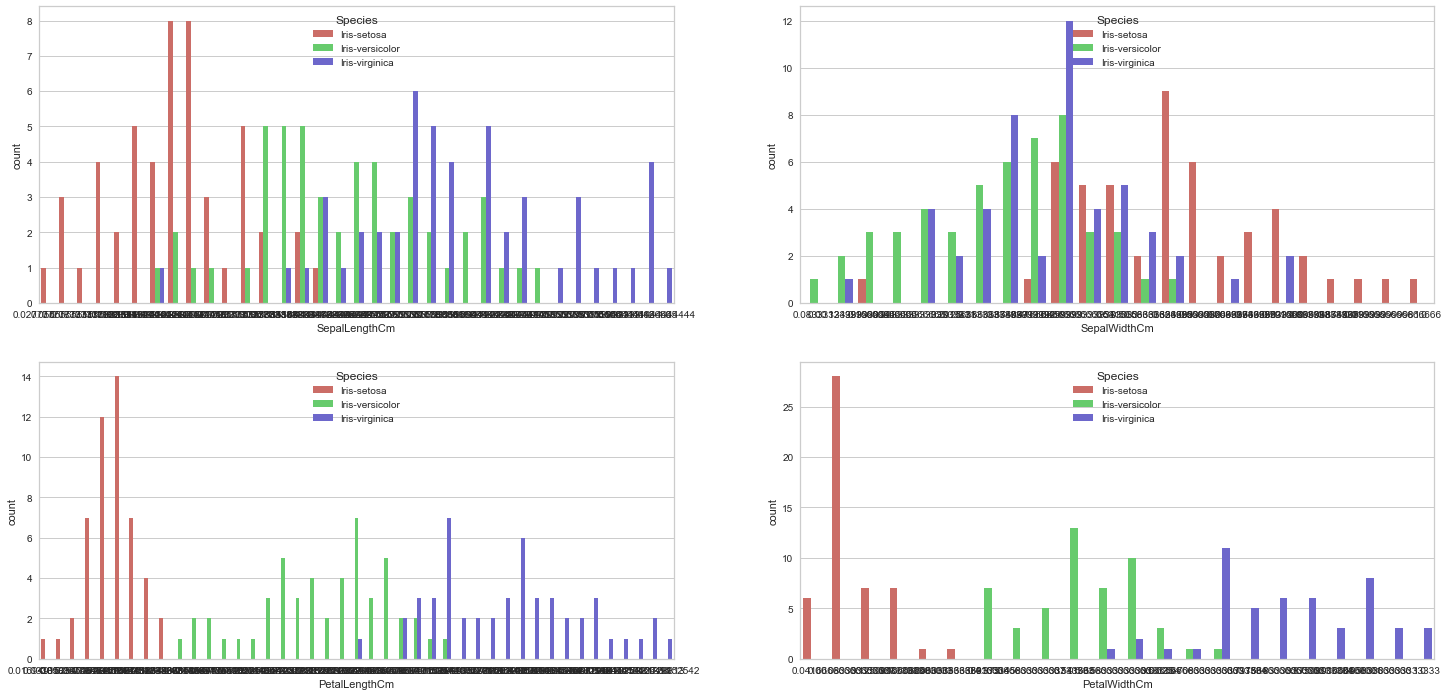

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (25, 12)) 
sns.countplot(x="SepalLengthCm", data=normalized_iris_df, hue="Species",
                palette="hls", ax=ax1)
sns.countplot(x="SepalWidthCm", data=normalized_iris_df, hue="Species",
                palette="hls", ax=ax2)
sns.countplot(x="PetalLengthCm", data=normalized_iris_df, hue="Species",
                palette="hls", ax=ax3)
sns.countplot(x="PetalWidthCm", data=normalized_iris_df, hue="Species",
                palette="hls", ax=ax4)


<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

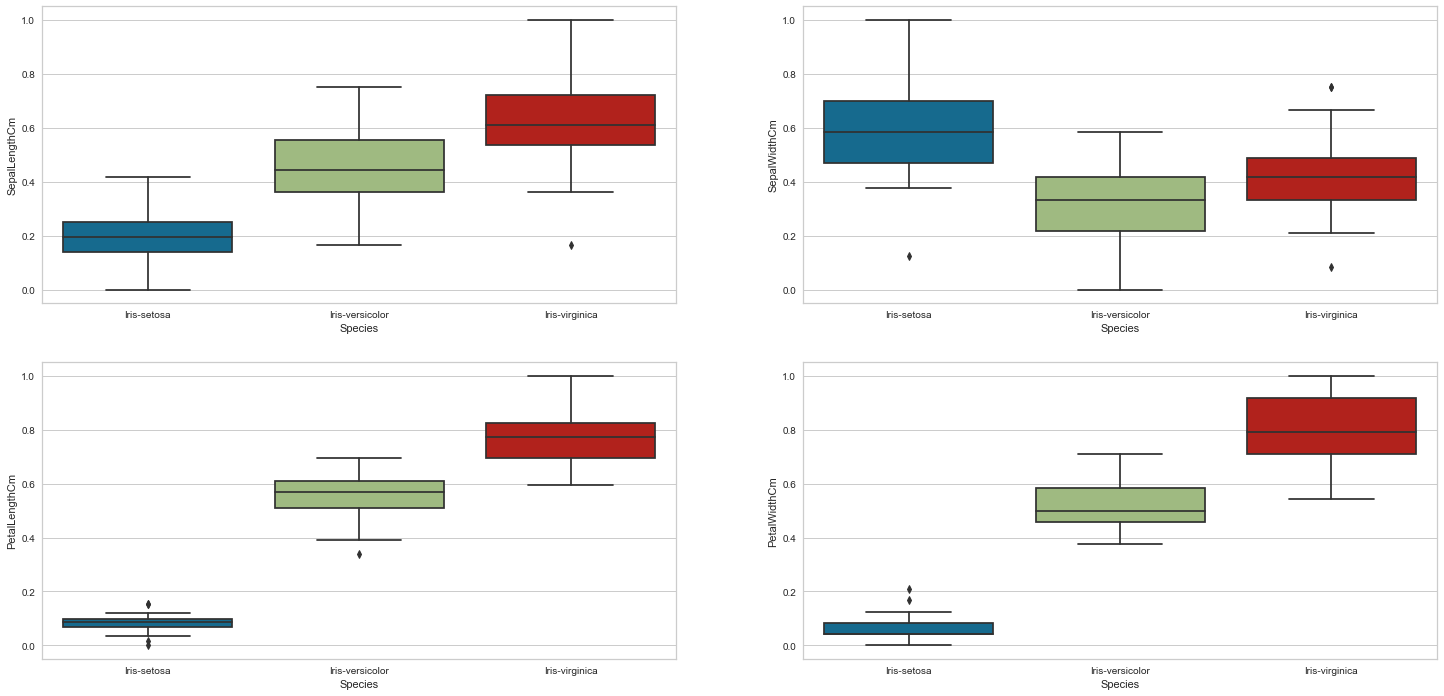

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (25, 12)) 
sns.boxplot(x="Species", y="SepalLengthCm",  data=normalized_iris_df, ax=ax1)
sns.boxplot(x="Species", y="SepalWidthCm",  data=normalized_iris_df, ax=ax2)
sns.boxplot(x="Species", y="PetalLengthCm",  data=normalized_iris_df, ax=ax3)
sns.boxplot(x="Species", y="PetalWidthCm",  data=normalized_iris_df, ax=ax4)

The data is clean enough, no null values, all the feature columns have a dtype of float64, which means that there is no other type than a floating number in them.

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


With sepal_area can see better correlation values than with SepalWidthCm

In [10]:
normalized_iris_df.corr().style.background_gradient(cmap="Blues")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Now that we have a clean and normalized dataset, let's divide the dataset to X (conataining the feature columns), and y (containig the label column)

In [11]:
X, y = normalized_iris_df.drop(columns=["Species"], axis=1), iris_df['Species']

With the LabelEncoder class, we tranform the categorical target column, to numerical

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
label_target = pd.DataFrame({'Label': [0,1,2], 'Target': le.classes_},
                                columns = ['Label', 'Target']).style.hide(axis='index')
label_target

Label,Target
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


Now we split the dataset into Training Dataset and Testing dataset.<br>
Some might argue that we needed a third Cross-Validation dataset, but we only have 150 training example.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify = y, random_state=0)
print('Training dataset:', X_train.shape)
print('Test dataset:', X_test.shape)
print('Training labels:', y_train.shape)
print('Test labels:', y_test.shape)

Training dataset: (120, 4)
Test dataset: (30, 4)
Training labels: (120,)
Test labels: (30,)


Below is two functions:
* plot_learning_results(model, X_train, X_test, y_train, y_test, classes), which plots the following:
    * The Confusion Matrix from [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html). The confusion matrix gives us the following results:<br>
        **True Positive: TP**<br>
        Interpretation: The model predicted positive and it’s true.<br>
        The model correctly predicted that the Iris flower is of a certain category

        **True Negative: TN**<br>
        Interpretation: The model predicted negative and it’s true.<br>
        The model correctly predicted that the Iris flower is not of a certain category

        **False Positive: (Type I Error) FP**<br>
        Interpretation: The model predicted positive and it’s false.<br>
        The model falsly predicted that the Iris flower is of a certain category

        **False Negative: (Type II Error) FN**<br>
        Interpretation: The model predicted negative and it’s false.<br>
        The model falsly predicted that the Iris flower is not of a certain category
    * The Learning Curve from [Yellowbrick](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html).<br>
        Line plot of learning (y-axis) over experience (x-axis).
        Learning curves are widely used in machine learning for algorithms that learn (optimize their internal parameters) incrementally over time, such as deep learning neural networks. It gives us two curves:<br>

        **Train Learning Curve:** Learning curve calculated from the training dataset that gives an idea of how well the model is learning.<br>
        
        **Validation Learning Curve:** Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.
    * The Precision-Recall Curve from [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/prcurve.html)<br>
        Shows the tradeoff between a classifier’s precision, a measure of result relevancy, and recall, a measure of completeness. For each class, precision is defined as the ratio of TP to the sum of true and FP, and recall is the ratio of TP to the sum of TP and FN (see Confusion Matrix).
        
        **Precision** can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of TP to the sum of true and FP. Said another way, “for all instances classified positive, what percent was correct?”
        $$\begin{align*} 
        \;  Precision &= \frac{TP}{TP + FP} \newline 
        \end{align*}$$
        **Recall** is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of TP to the sum of TP and FN. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
        $$\begin{align*} 
        \;Recall &= \frac{TP}{TP + FN}  \newline 
        \end{align*}$$
        **Average precision** expresses the precision-recall curve in a single number, which represents the area under the curve. It is computed as the weighted average of precision achieved at each threshold, where the weights are the differences in recall from the previous thresholds.
        $$\begin{align}
        \; Average\space Precision &= \sum\limits_{n} (Recall_{n} - Recall_{n-1})Precision_{n}\newline
        \end{align}$$
        Both Precision and Recall vary between 0 and 1.
    * The AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve also written as AUROC (Area Under the Receiver Operating Characteristics) from [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html)<br>
        It is a performance metric that used to evaluate classification models.<br>
        The worst AUROC is 0.5, and the best AUROC is 1.0
        * An AUROC of 0.5 corresponds to a coin flip, i.e. a useless model.<br>
        * An AUROC less than 0.7 is sub-optimal performance<br>
        * An AUROC of 0.70 – 0.80 is good performance<br>
        * An AUROC greater than 0.8 is excellent performance<br>
        * An AUROC of 1.0 corresponds to a perfect classifier<br><br>
    * Training and Testing loss functions in case the model is the XGBoost's XGBClassifer
        If both the Testing loss and the Training loss are high, then our model is Biased or Underfitted. The model is unable to accurately model the training data, and hence generates large errors.
        If the Training loss is low and the Testing loss is much higher then our model has high Variance or is Overfitted. The model did well on the Training dataset, but poorly on the Testing data.
        If both the Testing loss and the Training loss are low, then we a good fitted model.
    * The [decision tree shape](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) in case the model is a DecisionTreeClassifier
* model_report(y_pred, y_test), which return the accuracy score of the model, and the classification report (Confusion matrix report)
        

In [14]:

def plot_learning_results(model, X_train, X_test, y_train, y_test, classes):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(25, 12))

    cm_matrix = ConfusionMatrix(model, ax=ax1, is_fitted=True, classes=classes, 
                                    title='Confusion Matrix')
    cm_matrix.class_counts_ = len(le.classes_)
    cm_matrix.score(X_test.values, y_test)
    cm_matrix.finalize()

    ln_curve = LearningCurve(model, ax=ax2, is_fitted=False, classes=classes, 
                                    title='Learning Curve')
    ln_curve.fit(np.concatenate([X_train.values, X_test.values]), 
                    np.concatenate([y_train, y_test]))
    ln_curve.finalize()
    pr_re = PrecisionRecallCurve(model, ax=ax3, classes=classes, ap_score = True,
                                    iso_f1_curves = True, title='Precision Recall', 
                                    per_class=True, micro=False, 
                                    colors=["purple", "cyan", "blue"],)
    pr_re.class_counts_ = len(le.classes_)
    pr_re.fit(X_train.values, y_train)
    pr_re.score(X_test.values, y_test)
    pr_re.finalize()

    auc_roc = ROCAUC(model, ax=ax4, classes=classes, is_fitted=True, micro=False,
                                    title='Precision Recall', per_class=True,
                                    colors=["purple", "cyan", "blue"],)
    auc_roc.class_counts_ = len(le.classes_)
    auc_roc.target_type_ = 'multiclass'
    auc_roc.score(X_test.values, y_test)
    auc_roc.finalize()

    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        epochs = len(results['validation_0']['merror'])
        x_axis = range(0, epochs)

        ax5.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
        ax5.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
        ax5.legend()
        ax5.set_ylim([0, 1])
        ax5.set_ylabel('Log Loss')
        ax5.set_title('XGBoost Log Loss')

        ax6.plot(x_axis, results['validation_0']['merror'], label='Train')
        ax6.plot(x_axis, results['validation_1']['merror'], label='Test')
        ax6.legend()
        ax6.set_ylim([0, 1])
        ax6.set_ylabel('Classification Error')
        ax6.set_title('XGBoost Classification Error')

    if isinstance(model, DecisionTreeClassifier):
        from sklearn import tree
        tree.plot_tree(model, ax=ax5)

    plt.tight_layout();

def model_report(y_pred, y_test):
    return accuracy_score(y_pred, y_test), classification_report(y_test, y_pred)



Accuracy: 86.67%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.60      0.75        10
           2       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30



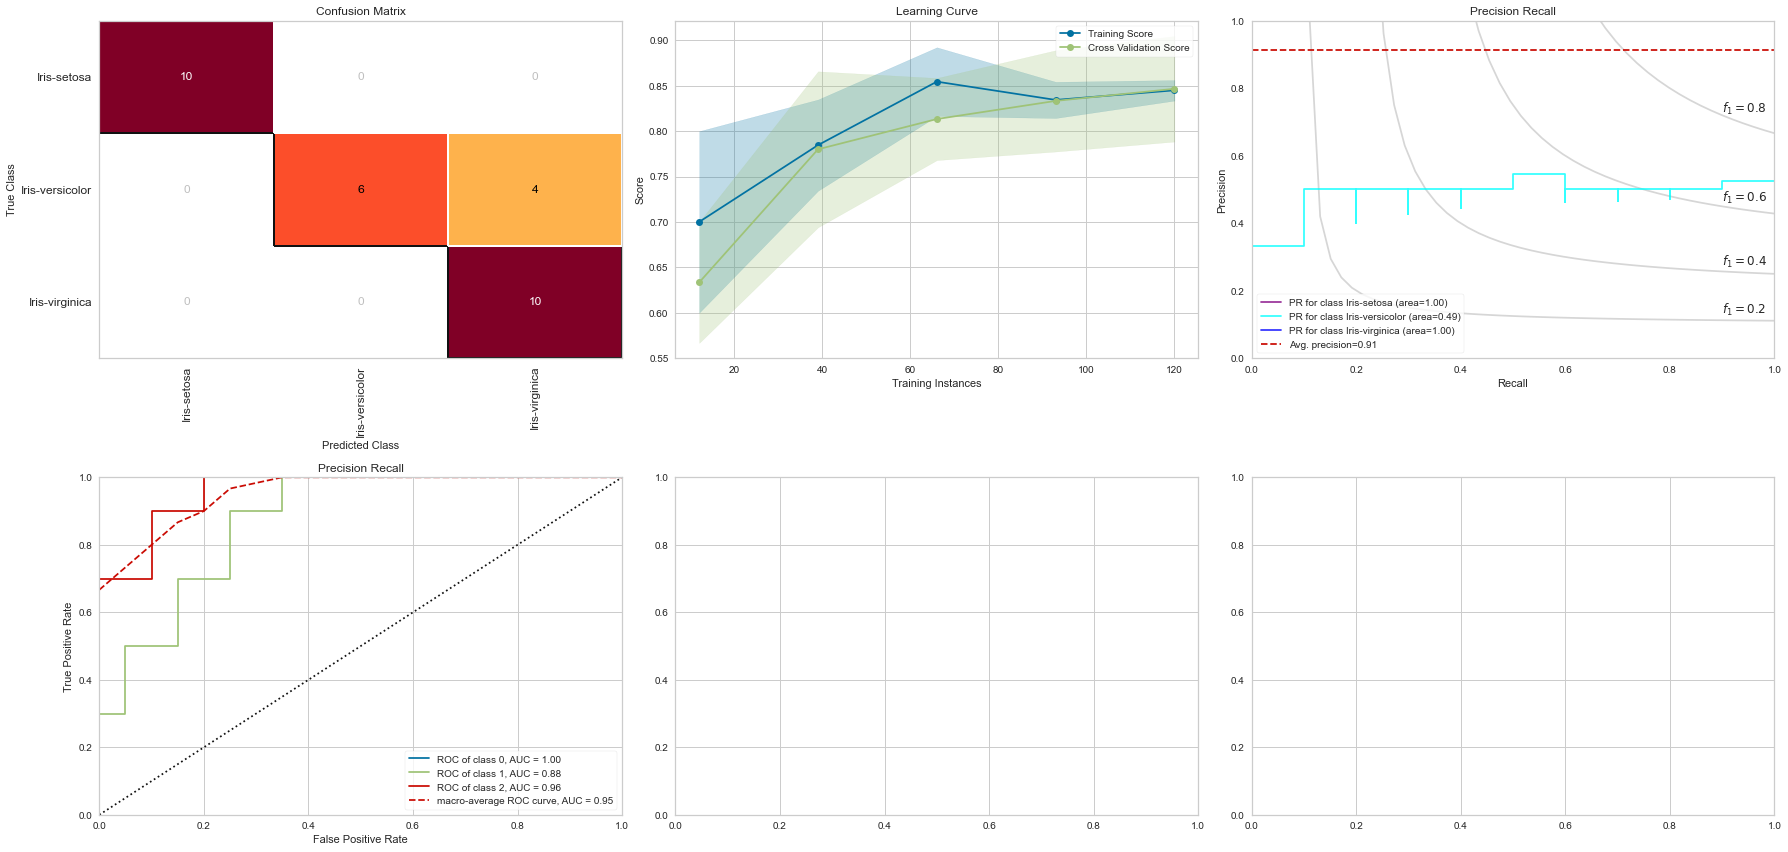

In [15]:
model_logr = LogisticRegression(solver='liblinear', multi_class='ovr')
model_logr.fit(X_train.values, y_train)

y_pred_logr = model_logr.predict(X_test.values)

y_probs = model_logr.predict_proba(X_test.values)

logr_acc, rep_logr = model_report(y_pred_logr, y_test)
print('Accuracy: {:.2f}%'.format(logr_acc*100))
print('Classification report')
print(rep_logr)
plot_learning_results(model_logr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, classes=le.classes_) 

Accuracy: 96.67%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



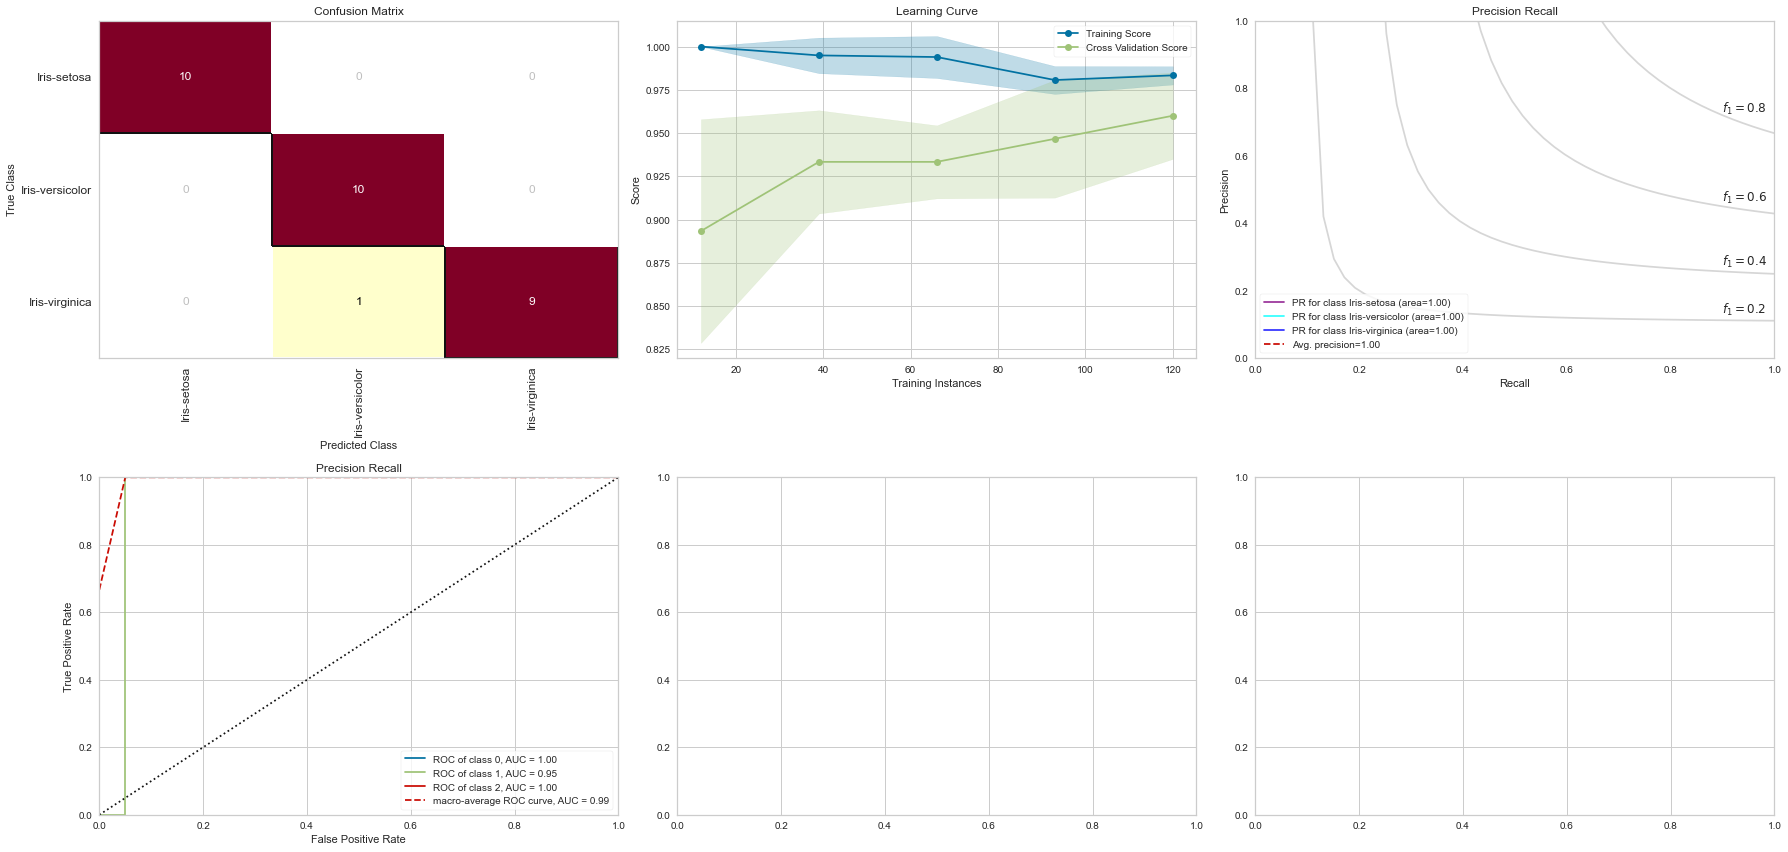

In [16]:

model_svm = SVC(kernel='poly', degree=3, C=1)
model_svm.fit(X_train.values, y_train)

y_pred_svm = model_svm.predict(X_test.values)

svm_acc, rep_svm = model_report(y_pred_svm, y_test)
print('Accuracy: {:.2f}%'.format(svm_acc*100))
print('Classification report')
print(rep_svm)
plot_learning_results(model_svm, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, classes=le.classes_) 

Accuracy: 100.00%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



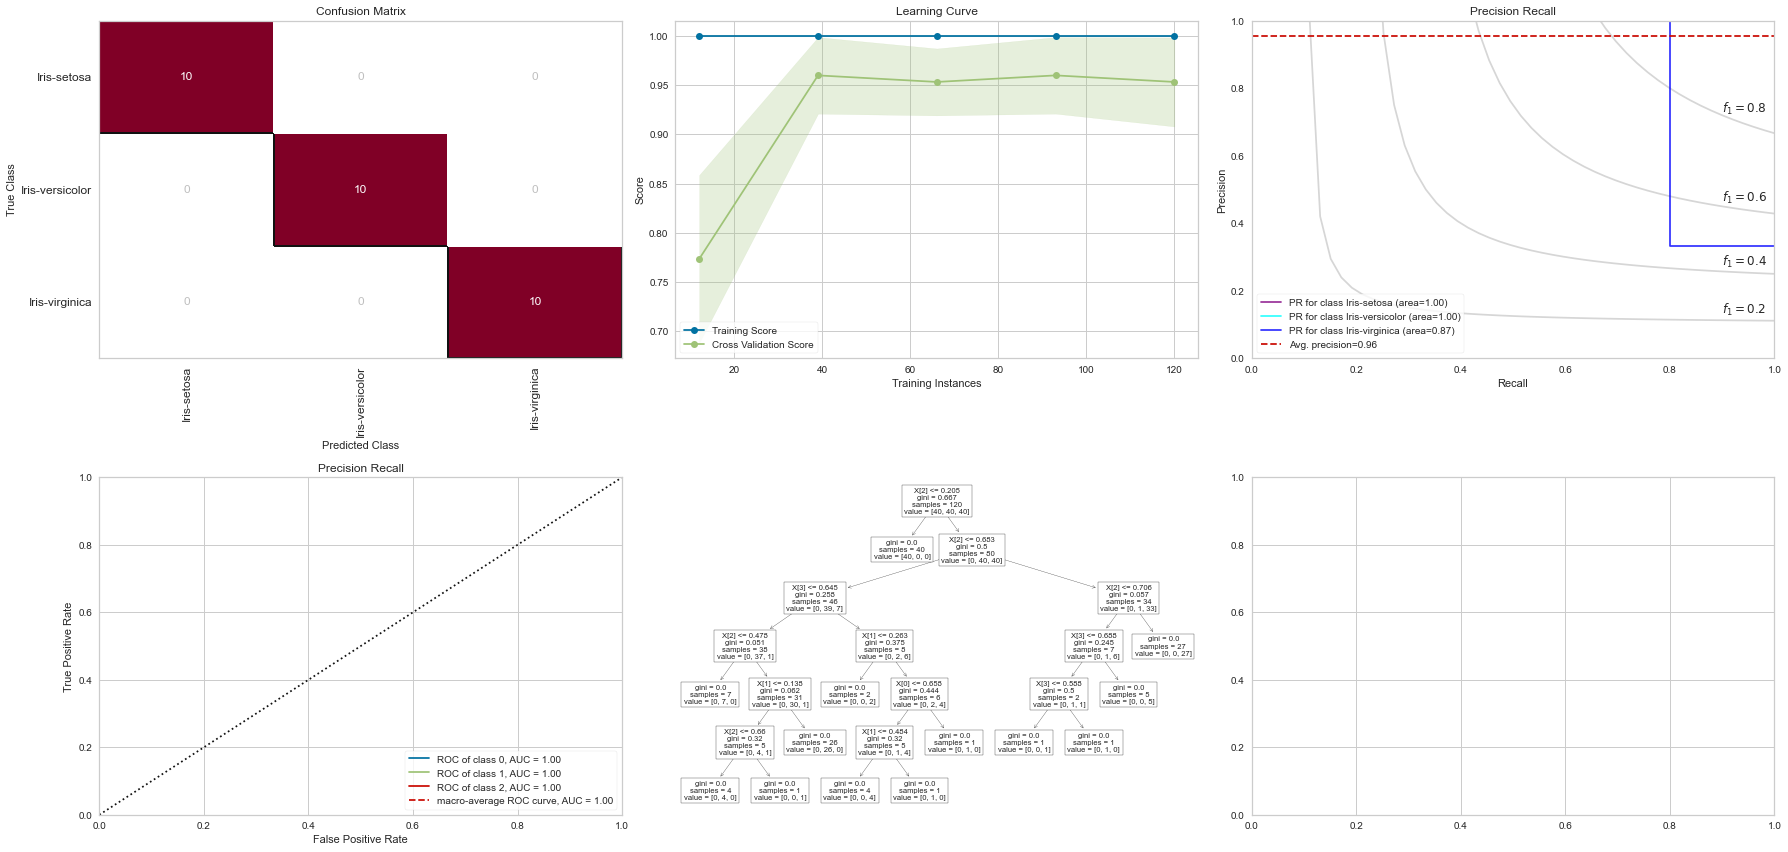

In [17]:

model_dt = DecisionTreeClassifier(random_state = 0, splitter = 'random',)
eval_set = [(X_train, y_train), (X_test, y_test)]
model_dt.fit(X_train.values, y_train,)
y_pred_dt = model_dt.predict(X_test.values)

dt_acc, rep_dt = model_report(y_pred_dt, y_test)
print('Accuracy: {:.2f}%'.format(dt_acc*100))
print('Classification report')
print(rep_dt)
plot_learning_results(model_dt, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, classes=le.classes_) 

Accuracy: 93.33%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



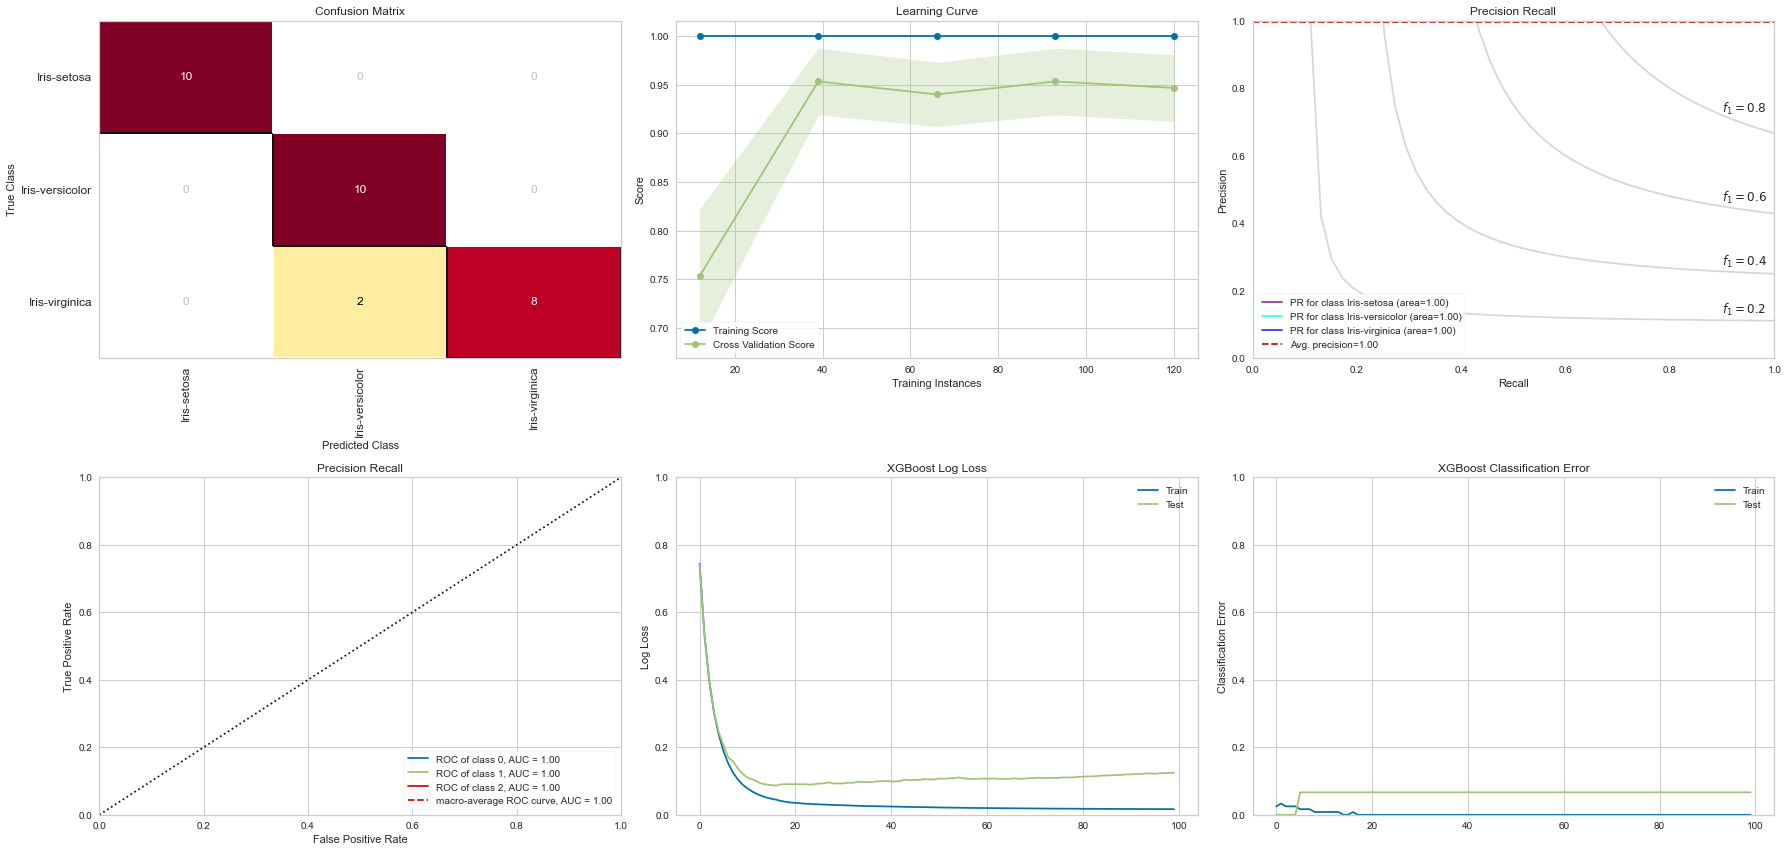

In [18]:
seed = 7
test_size = 0.33

model_xgb = XGBClassifier(eval_metric=["merror", "mlogloss"], n_jobs=-1, num_class=len(le.classes_))
eval_set = [(X_train, y_train), (X_test, y_test)]
model_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=0)
y_pred_xgb = model_xgb.predict(X_test.values)

xgb_acc, rep_xgb = model_report(y_pred_xgb, y_test)
print('Accuracy: {:.2f}%'.format(xgb_acc*100))
print('Classification report')
print(rep_xgb)
plot_learning_results(model_xgb, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, classes=le.classes_) 

Feature: 0, Score: 0.01970
Feature: 1, Score: 0.01799
Feature: 2, Score: 0.59200
Feature: 3, Score: 0.37032


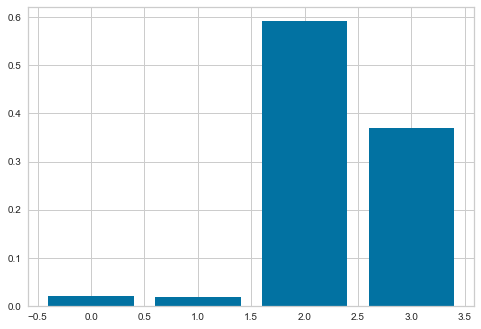

In [19]:
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Now we have the Accuracy of the four Supervised Learning Algorithms

In [20]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'XGBoost'], 
                        'Accuracy': ["%.2f" % logr_acc, "%.2f" % svm_acc, "%.2f" % dt_acc, "%.2f" % xgb_acc]})

compare.sort_values(by = 'Accuracy', ascending = False).style.hide(axis='index')

Model,Accuracy
Decision Tree,1.00
Support Vector Machine,0.97
XGBoost,0.93
Logistic Regression,0.87


### The Unsupervised Learning Algorithm
#### The K-means
First I implemented the algorithm with Numpy and plotted it with Seaborn and Matplotlib (Inspired by the Machine Learning Specialization mentioned at the begining of the notebook)
Then used the sklearn framework and got the same results

In [21]:

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx
    
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):   
        points = X[idx==k]
        centroids[k] = np.mean(points, axis = 0)     
    return centroids

def draw_line(p1, p2, ax):
    ax.plot([p1[2], p2[2]], [p1[3], p2[3]], '-k', linewidth=1)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, ax):
    colormap = np.array(['r', 'g', 'b'])
    ax.scatter(X[:, 2], X[:, 3], c=colormap[idx], s = 30, edgecolors="face")
    ax.scatter(centroids[:, 2], centroids[:, 3], c='black', marker='x')
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :], ax=ax)

def run_kMeans(X, initial_centroids, max_iters=10):
    fig, ax = plt.subplots(1)
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        plot_progress_kMeans(X, centroids, previous_centroids, idx, ax)
        previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    ax.set_xlabel('PetalLengthCm')
    ax.set_ylabel('PetalWidthCm')
    custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=7),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=7),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=7),
                    Line2D([0], [0], color='black', markersize=7),
                          ]
    ax.legend(custom_lines, ['Iris-setosa', 'Iris-virginica', 'Iris-versicolour', 'Centroids progession'])
    plt.tight_layout(); 
    return centroids, idx

Here we do no need to split the data, nor the labels of the data.

In [29]:
X, y = iris_df.drop(columns=["Species", "Id"], axis=1), iris_df['Species']
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
The shape of X is: (150, 4)


We start by randomly selecting initial centroids points, and iteration number.<br>
In the plot we can see where the centroids started, and how they moved upon each iteration based on the minimum norm value of the distance (difference) between the centroids and points (records)<br>
Finally they settled each in the center of its own cluster

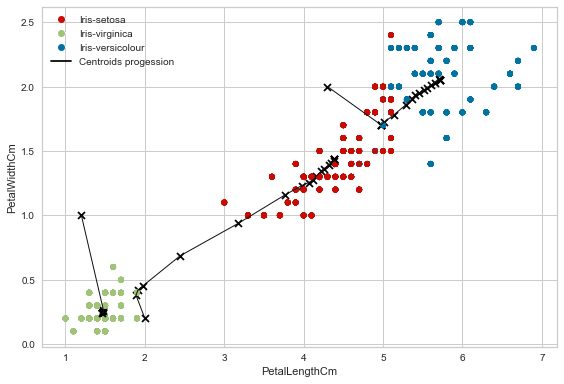

In [30]:
initial_centroids = np.array([[5.5,2.0,2.0,0.2], [5.7,3.7,1.2,1], [6.5,2.5,4.3,2]])
max_iters = 20
centroids, idx = run_kMeans(X.to_numpy(), initial_centroids, max_iters)

Using sklearn's KMeans class, we first fit the model with a range from 1 to 11 clusters, and then use the KElbowVisualizer to find the correct number of clusters.<br>
[KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) implements the [Elbow method](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/) to help  select the optimal number of clusters by fitting the model with a range of values for. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

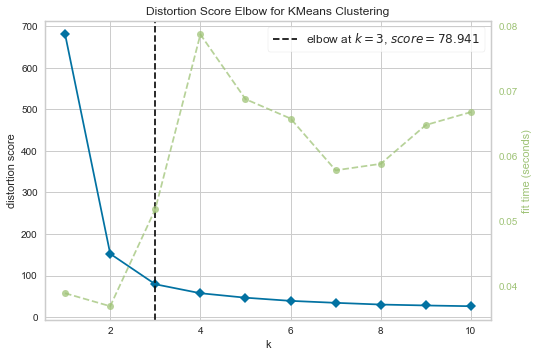

In [31]:
kmeans = KMeans(random_state = 0)
y_kmeans = kmeans.fit_predict(X)

model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(X)
model.show();

Now that we have the correct number of clusters, we refit the model

In [32]:

kmeans = KMeans(random_state = 0, n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

Finally we plot and we see we have the same result as the numpy implementation

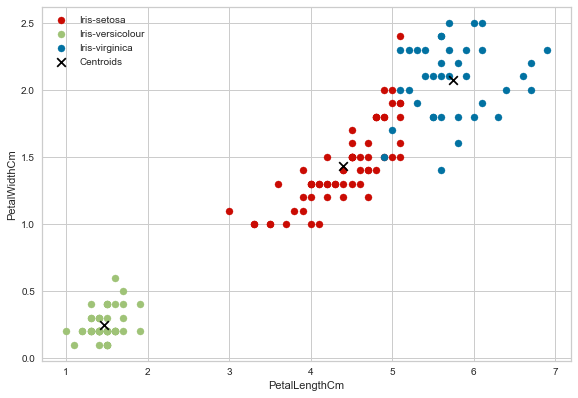

In [33]:
# --- Plotting Clusters in Scatter Plot ---
plt.scatter(X.to_numpy()[y_kmeans == 0, 2], X.to_numpy()[y_kmeans == 0, 3], s = 50, c = 'r', label = 'Iris-setosa')
plt.scatter(X.to_numpy()[y_kmeans == 1, 2], X.to_numpy()[y_kmeans == 1, 3], s = 50, c = 'g', label = 'Iris-versicolour')
plt.scatter(X.to_numpy()[y_kmeans == 2, 2], X.to_numpy()[y_kmeans == 2, 3], s = 50, c = 'b', label = 'Iris-virginica')

# --- Plotting Centroids of Each Clusters ---
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 75, c = 'black', label = 'Centroids', marker='x')

plt.tight_layout()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
